# Recommender Systems with Python

Welcome to the code notebook for Recommender Systems with Python. In this project we will develop basic recommendation systems using Python and pandas. 

In this notebook, we will focus on providing a basic recommendation system by suggesting items that are most similar to a particular item, in this case, movies. This is not a true robust recommendation system, to describe it more accurately,it just tells you what movies/items are most similar to your movie choice.


In [62]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [63]:
col_names=['user_id', 'item_id', 'rating', 'timestamp']

In [64]:
df=pd.read_csv('u.data', sep='\t', names=col_names) #sep: seperate the whole row by space, and asign the col-name.
df.head()

,user_id,item_id,rating,timestamp
0,0,50,5,881250949
1,0,172,5,881250949
2,0,133,1,881250949
3,196,242,3,881250949
4,186,302,3,891717742


In [65]:
movie_title=pd.read_csv('Movie_Id_Titles')
movie_title.head()

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


- Merge the dataset: rating and title on item_id.

In [66]:
df=pd.merge(df, movie_title, on='item_id')
df.head()

,user_id,item_id,rating,timestamp,title
0,0,50,5,881250949,Star Wars (1977)
1,290,50,5,880473582,Star Wars (1977)
2,79,50,4,891271545,Star Wars (1977)
3,2,50,5,888552084,Star Wars (1977)
4,8,50,5,879362124,Star Wars (1977)


- Group by (aggregate) and plot:

In [67]:
sns.set_style('white')
%matplotlib inline

- Sort the average rating de-ascending for every title.

In [68]:
df.groupby('title')['rating'].mean().sort_values(ascending=False)

title
Marlene Dietrich: Shadow and Light (1996)                 5.000000
Prefontaine (1997)                                        5.000000
Santa with Muscles (1996)                                 5.000000
Star Kid (1997)                                           5.000000
Someone Else's America (1995)                             5.000000
Entertaining Angels: The Dorothy Day Story (1996)         5.000000
Saint of Fort Washington, The (1993)                      5.000000
Great Day in Harlem, A (1994)                             5.000000
They Made Me a Criminal (1939)                            5.000000
Aiqing wansui (1994)                                      5.000000
Pather Panchali (1955)                                    4.625000
Anna (1996)                                               4.500000
Everest (1998)                                            4.500000
Maya Lin: A Strong Clear Vision (1994)                    4.500000
Some Mother's Son (1996)                                

- Sort the rating count in average for every title:

In [69]:
df.groupby('title')['rating'].count().sort_values(ascending=False)

title
Star Wars (1977)                                     584
Contact (1997)                                       509
Fargo (1996)                                         508
Return of the Jedi (1983)                            507
Liar Liar (1997)                                     485
English Patient, The (1996)                          481
Scream (1996)                                        478
Toy Story (1995)                                     452
Air Force One (1997)                                 431
Independence Day (ID4) (1996)                        429
Raiders of the Lost Ark (1981)                       420
Godfather, The (1972)                                413
Pulp Fiction (1994)                                  394
Twelve Monkeys (1995)                                392
Silence of the Lambs, The (1991)                     390
Jerry Maguire (1996)                                 384
Chasing Amy (1997)                                   379
Rock, The (1996)         

- Get mean rating dataset by title(index):

In [70]:
ratings = pd.DataFrame(df.groupby('title')['rating'].mean())
ratings.head()

,rating
title,
'Til There Was You (1997),2.333333
1-900 (1994),2.600000
101 Dalmatians (1996),2.908257
12 Angry Men (1957),4.344000
187 (1997),3.024390


In [71]:
ratings['num of ratings']=df.groupby('title')['rating'].count()

In [72]:
ratings.head()

,rating,num of ratings
title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41


- Plot:

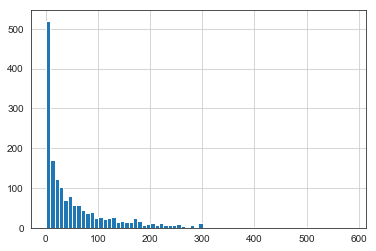

In [73]:
ratings['num of ratings'].hist(bins=70)

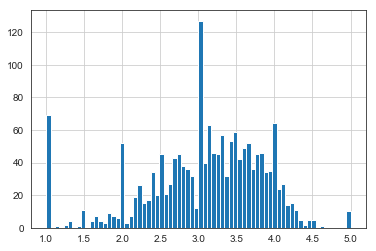

In [74]:
ratings['rating'].hist(bins=70)

- Check the relationship between the 'number of ratings' & 'rating'

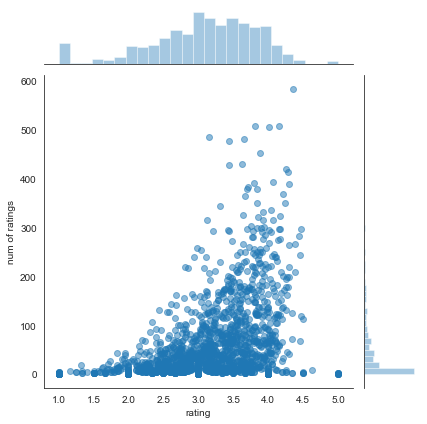

In [75]:
sns.jointplot(x='rating', y='num of ratings', alpha=0.5, data=ratings)

## Recommending Similar Movies

Now let's create a matrix that has the user ids on one access and the movie title on another axis. Each cell will then consist of the rating the user gave to that movie. Note there will be a lot of NaN values, because most people have not seen most of the movies.

In [76]:
df.head(5)

,user_id,item_id,rating,timestamp,title
0,0,50,5,881250949,Star Wars (1977)
1,290,50,5,880473582,Star Wars (1977)
2,79,50,4,891271545,Star Wars (1977)
3,2,50,5,888552084,Star Wars (1977)
4,8,50,5,879362124,Star Wars (1977)


In [77]:
moviemat=pd.pivot_table(index='user_id', columns='title', values='rating', data=df)
moviemat.head(10)

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,2.0,NaN,NaN,NaN,NaN,4.0,NaN,NaN,...,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,4.0,NaN
6,NaN,NaN,NaN,4.0,NaN,NaN,NaN,5.0,NaN,NaN,...,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,4.0,NaN,NaN,5.0,5.0,NaN,4.0,...,NaN,NaN,NaN,5.0,3.0,NaN,3.0,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [78]:
ratings.head(3)

,rating,num of ratings
title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109


In [79]:
ratings.sort_values('num of ratings', ascending=False)
ratings.head(4)

,rating,num of ratings
title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125


- Find the 'star war' & 'Titanic' rating:

In [80]:
starwar_user_rating=moviemat['Star Wars (1977)']
titanic_user_rating=moviemat['Titanic (1997)']

In [81]:
starwar_user_rating.head(4)

user_id
0    5.0
1    5.0
2    5.0
3    NaN
Name: Star Wars (1977), dtype: float64

In [82]:
titanic_user_rating.head(4)

user_id
0    NaN
1    NaN
2    5.0
3    NaN
Name: Titanic (1997), dtype: float64

In [98]:
moviemat.head(4)

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### corrwith():

#### DataFrame.corrwith(other, axis=0, drop=False, method='pearson')
- Compute pairwise correlation between rows or columns of DataFrame with rows or columns of Series or DataFrame.
- DataFrames are first aligned along both axes before computing the correlations.
- If the shape of two dataframe object is not same then the corresponding correlation value will be a NaN value.

- Use corrwith() method to get correlations between two pandas series:

In [101]:
sim_titanic=moviemat.corrwith(titanic_user_rating)
sim_titanic.dropna(inplace=True) #Let's clean this by removing NaN values and using a DataFrame instead of a series:
sim_titanic.head(5)

c:\python37\lib\site-packages\numpy\lib\function_base.py:2522: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
c:\python37\lib\site-packages\numpy\lib\function_base.py:2451: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


title
'Til There Was You (1997)     -0.062017
101 Dalmatians (1996)          0.120113
12 Angry Men (1957)            0.077700
187 (1997)                     0.315654
2 Days in the Valley (1996)    0.017295
dtype: float64

In [104]:
sim_starwar=moviemat.corrwith(starwar_user_rating)
sim_starwar.dropna(inplace=True)
sim_starwar.head(5)

title
'Til There Was You (1997)    0.872872
1-900 (1994)                -0.645497
101 Dalmatians (1996)        0.211132
12 Angry Men (1957)          0.184289
187 (1997)                   0.027398
dtype: float64

- Assign the correlation col with name of 'Correlation':

In [85]:
corr_starwar=pd.DataFrame(sim_starwar, columns=['Correlation'])
corr_titanic=pd.DataFrame(sim_titanic, columns=['Correlation'])

In [86]:
corr_titanic.head(5)

,Correlation
title,
'Til There Was You (1997),-0.062017
1-900 (1994),NaN
101 Dalmatians (1996),0.120113
12 Angry Men (1957),0.077700
187 (1997),0.315654


Now if we sort the dataframe by correlation, we should get the most similar movies, however note that we get some results that don't really make sense. This is because there are a lot of movies only watched once by users who also watched star wars (it was the most popular movie). 

In [87]:
corr_starwar.sort_values('Correlation', ascending=False).head(10)

,Correlation
title,
Hollow Reed (1996),1.0
Commandments (1997),1.0
Cosi (1996),1.0
No Escape (1994),1.0
Stripes (1981),1.0
Star Wars (1977),1.0
Man of the Year (1995),1.0
"Beans of Egypt, Maine, The (1994)",1.0
"Old Lady Who Walked in the Sea, The (Vieille qui marchait dans la mer, La) (1991)",1.0


In [88]:
corr_titanic.sort_values('Correlation', ascending=False).head(10)

,Correlation
title,
Nadja (1994),1.0
"Pest, The (1997)",1.0
"Savage Nights (Nuits fauves, Les) (1992)",1.0
For Ever Mozart (1996),1.0
"Jerky Boys, The (1994)",1.0
"Newton Boys, The (1998)",1.0
Hearts and Minds (1996),1.0
"Simple Wish, A (1997)",1.0
Purple Noon (1960),1.0


- Let's fix this by filtering out movies that have less than 100 reviews (this value was chosen based off the histogram from earlier).

In [89]:
corr_starwar = corr_starwar.join(ratings['num of ratings'])

In [90]:
corr_titanic = corr_titanic.join(ratings['num of ratings'])

### JOIN, MERGE, CONTEGATE:

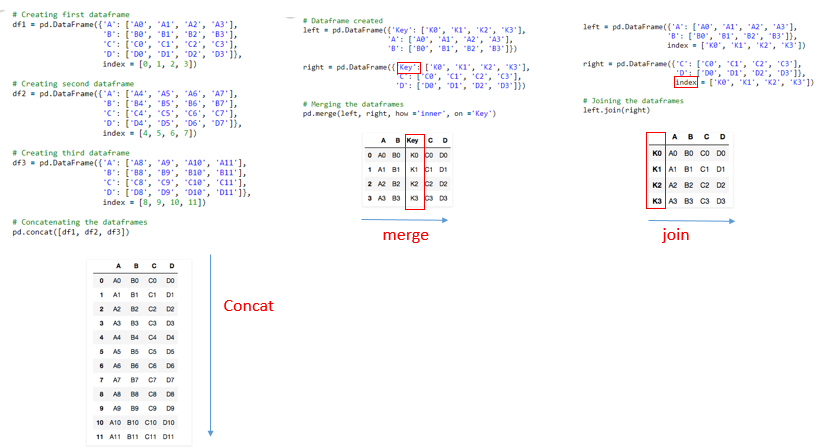

In [97]:
from IPython.display import Image
Image(filename='../../Image/join.png')

- Now sort the values and notice how the titles make a lot more sense:

In [92]:
corr_starwar = corr_starwar[corr_starwar['num of ratings']>100].sort_values('Correlation', ascending=False)
corr_titanic = corr_titanic[corr_titanic['num of ratings']>100].sort_values('Correlation', ascending=False)

In [93]:
corr_starwar.head(4)

,Correlation,num of ratings
title,,
Star Wars (1977),1.000000,584
"Empire Strikes Back, The (1980)",0.748353,368
Return of the Jedi (1983),0.672556,507
Raiders of the Lost Ark (1981),0.536117,420


In [94]:
corr_titanic.head(10)

,Correlation,num of ratings
title,,
Titanic (1997),1.000000,350
"River Wild, The (1994)",0.497600,146
"Abyss, The (1989)",0.472103,151
Bram Stoker's Dracula (1992),0.443560,120
True Lies (1994),0.435104,208
William Shakespeare's Romeo and Juliet (1996),0.430243,106
"Last of the Mohicans, The (1992)",0.427239,128
Outbreak (1995),0.426237,104
Die Hard (1988),0.403124,243
